In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pandas.plotting import scatter_matrix as scatter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
from sklearn.cluster import KMeans as kmeans
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import sklearn.preprocessing as skp
import sklearn.feature_selection as skfs

In [110]:
df_us = pd.read_csv("./YouTube Data/USvideos.csv")
df_ca = pd.read_csv("./YouTube Data/CAvideos.csv")
df_uk = pd.read_csv("./YouTube Data/GBvideos.csv")
# df_in = pd.read_csv("./YouTube Data/INvideos.csv")
# df_fr = pd.read_csv("./YouTube Data/FRvideos.csv")

In [3]:
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [178]:
df_us.corr(method ='pearson')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [179]:
df_us_drop = df_us.drop(columns = ["description", "title", "tags", "thumbnail_link", "video_id", "publish_time", "trending_date"])
df_us_drop = df_us_drop[0:50]
df_dummy = pd.get_dummies(df_us_drop)

In [181]:
df_dummy.corr(method ='pearson')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,channel_title_20th Century Fox,channel_title_Amazon.co.uk,...,channel_title_Tom Scott,channel_title_U2VEVO,channel_title_Vox,channel_title_amc,channel_title_dope2111,channel_title_hp_overload,channel_title_iJustine,channel_title_marshmello,channel_title_nigahiga,channel_title_officer401
category_id,1.000000,-0.150853,-0.163037,-0.219174,-0.169460,0.066129,NaN,NaN,-0.354028,0.066129,...,0.120932,-0.189619,0.084397,0.066129,0.102664,-0.335760,0.139200,-0.189619,0.066129,0.066129
views,-0.150853,1.000000,0.982226,0.934912,0.976258,-0.045667,NaN,NaN,0.001152,-0.045667,...,-0.038737,-0.043647,-0.032182,-0.041068,0.038043,-0.041431,-0.040214,-0.006951,0.075452,-0.043229
likes,-0.163037,0.982226,1.000000,0.927843,0.986101,-0.043032,NaN,NaN,-0.038688,-0.043032,...,-0.028266,-0.036346,-0.027129,-0.041184,-0.000676,-0.038064,-0.030797,0.101686,0.124582,-0.038387
dislikes,-0.219174,0.934912,0.927843,1.000000,0.947234,-0.042734,NaN,NaN,-0.041617,-0.042734,...,-0.042287,-0.041907,-0.013814,-0.037504,-0.007176,-0.033213,-0.032856,-0.014485,0.000177,-0.042399
comment_count,-0.169460,0.976258,0.986101,0.947234,1.000000,-0.040681,NaN,NaN,-0.037936,-0.040681,...,-0.032496,-0.037008,-0.021566,-0.030356,-0.023245,-0.036758,-0.029105,0.026892,0.100729,-0.035628
comments_disabled,0.066129,-0.045667,-0.043032,-0.042734,-0.040681,1.000000,NaN,NaN,-0.020408,1.000000,...,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408
ratings_disabled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video_error_or_removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_title_20th Century Fox,-0.354028,0.001152,-0.038688,-0.041617,-0.037936,-0.020408,NaN,NaN,1.000000,-0.020408,...,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408
channel_title_Amazon.co.uk,0.066129,-0.045667,-0.043032,-0.042734,-0.040681,1.000000,NaN,NaN,-0.020408,1.000000,...,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408


In [8]:
count_vectorizer = CountVectorizer(stop_words='english')
#counts = count_vectorizer.fit_transform(df_us['title'].values)

In [9]:
#count_vectorizer.vocabulary_

In [184]:
# print(df_us['category_id'].nunique())
#for i in df_us['category_id'].unique():
#    print(i)
#    print(df_us[df_us['category_id'] == i].count())
#    print("\n")
# df_us[df_us['category_id'] == 1].count()

In [185]:
#df_us.head()

# Mutual Info Regressions

# United States

In [14]:
for i in df_us['category_id'].unique():
    X = count_vectorizer.fit_transform(df_us['title'][df_us['category_id'] == i])
    Y = df_us['views'][df_us['category_id'] == i]
    res = dict(zip(count_vectorizer.get_feature_names(),
               skfs.mutual_info_regression(X, Y, discrete_features=True)
               ))
    print("Category: " + str(i))
    print(sorted(res.items(), key=lambda x: x[1], reverse = True)[0:10])
    print("\n")

Category: 22
[('primitive', 0.030911439814525488), ('technology', 0.030911439814525488), ('grace', 0.028626645514697957), ('helbig', 0.028626645514697957), ('interview', 0.02797910615948651), ('charlamagne', 0.027356605541006718), ('kanye', 0.027356605541006718), ('west', 0.027356605541006718), ('makeup', 0.027147657043132822), ('fan', 0.026940766385219028)]


Category: 24
[('official', 0.06808033882642217), ('trailer', 0.0509552095475132), ('hd', 0.02488706608433411), ('talk', 0.019871366276517533), ('studios', 0.01971914930994867), ('movie', 0.01846344311806436), ('2018', 0.017501520330744702), ('react', 0.016863928526823946), ('hirani', 0.016714144279337817), ('kapoor', 0.016714144279337817)]


Category: 23
[('lele', 0.051676449869815455), ('pons', 0.051676449869815455), ('reading', 0.039423134321247666), ('lip', 0.03861608189443255), ('bad', 0.03607158830646284), ('royal', 0.032957875351119825), ('yiay', 0.03173886845158491), ('wedding', 0.030411665223142204), ('10', 0.025761978305

In [15]:
for i in df_us['category_id'].unique():
    X = count_vectorizer.fit_transform(df_us['tags'][df_us['category_id'] == i])
    Y = df_us['views'][df_us['category_id'] == i]
    res = dict(zip(count_vectorizer.get_feature_names(),
               skfs.mutual_info_regression(X, Y, discrete_features=True)
               ))
    print("Category: " + str(i))
    print(sorted(res.items(), key=lambda x: x[1], reverse = True)[0:10])
    print("\n")

Category: 22
[('safiya', 0.09867605784904643), ('fashion', 0.08550474504227235), ('buzzfeed', 0.07313894925016307), ('interview', 0.064856141404666), ('makeup', 0.064695317347079), ('nygaard', 0.06346433552579223), ('try', 0.06015653125652487), ('family', 0.05858063858788842), ('safia', 0.05667360749811934), ('music', 0.05568963721304332)]


Category: 24
[('movie', 0.05727733589563466), ('trailer', 0.05502965002988791), ('2018', 0.051071889041310436), ('new', 0.047035069525851236), ('official', 0.04224672715009903), ('marvel', 0.0388213239112809), ('black', 0.03760431980878498), ('news', 0.03698091794209213), ('youtube', 0.03646153760917481), ('challenge', 0.035047889947450894)]


Category: 23
[('hannah', 0.0874815128557469), ('funny', 0.08386585402403557), ('anwar', 0.07362884491085286), ('comedy', 0.07260940432970764), ('alesso', 0.07144884130134144), ('inanna', 0.0675793971121077), ('sarkis', 0.0675793971121077), ('shots', 0.06584107606151868), ('sketch', 0.06412069690340183), ('ani

In [25]:
df2 = df_us._get_numeric_data()
df2 = df2.drop(columns='views')

In [26]:
mutual_information = skfs.mutual_info_regression(df2, df_us['views'])

In [27]:
mutual_list_name = []
mutual_list_value = []
count = 0
for i in df2:
    mutual_list_value.append(mutual_information[count])
    mutual_list_name.append(i)
    count += 1


mutual_list = pd.DataFrame(columns = ['Feature', 'Value'])
mutual_list['Feature'] = mutual_list_name
mutual_list['Value'] = mutual_list_value

In [28]:
mutual_list_sorted = mutual_list.sort_values(by='Value', ascending = False)
mutual_list_sorted.reset_index(drop = True)

,Feature,Value
0,likes,1.013962
1,dislikes,0.884180
2,comment_count,0.812184
3,category_id,0.096716
4,comments_disabled,0.005511
5,ratings_disabled,0.003489
6,video_error_or_removed,0.000000


In [173]:
df2 = df_us._get_numeric_data()

In [174]:
reg_list = []
feat_list = []
for i in df2:
    current_reg = skfs.mutual_info_regression(df2, df2[i])
    reg_list.append(current_reg)
    feat_list.append(i)

df_reg = pd.DataFrame(reg_list, index = feat_list, columns = feat_list)
print(df_reg)

                        category_id     views     likes  dislikes  \
category_id                2.339122  0.096770  0.175035  0.102174   
views                      0.096603  9.359378  1.013910  0.884143   
likes                      0.174249  1.013947  9.191349  0.912415   
dislikes                   0.108120  0.884319  0.911166  7.908044   
comment_count              0.144997  0.811964  1.213898  1.076714   
comments_disabled          0.005086  0.005520  0.017324  0.012350   
ratings_disabled           0.000000  0.003489  0.027731  0.018828   
video_error_or_removed     0.001457  0.000000  0.000000  0.000797   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                  0.144154           0.017505          0.002480   
views                        0.812061           0.005529          0.003497   
likes                        1.214024           0.016263          0.026633   
dislikes                     1.077588           0.012133          

# Canada

In [19]:
for i in df_ca['category_id'].unique():
    X = count_vectorizer.fit_transform(df_ca['title'][df_ca['category_id'] == i])
    Y = df_ca['views'][df_ca['category_id'] == i]
    res = dict(zip(count_vectorizer.get_feature_names(),
               skfs.mutual_info_regression(X, Y, discrete_features=True)
               ))
    print("Category: " + str(i))
    print(sorted(res.items(), key=lambda x: x[1], reverse = True)[0:10])
    print("\n")

Category: 10
[('songs', 0.02579618750346535), ('latest', 0.015713611935045835), ('official', 0.015565748946826163), ('2018', 0.015164273418876606), ('punjabi', 0.014974353149634467), ('video', 0.013194133159135202), ('song', 0.012975946528459126), ('lyrics', 0.010789182722583668), ('launch', 0.010504870694180823), ('enima', 0.009982857131742628)]


Category: 23
[('closer', 0.03676753206399219), ('look', 0.03589249527421812), ('daily', 0.03284499049893319), ('awards', 0.02358429980318877), ('comment', 0.02311157696423649), ('lele', 0.01880226109914862), ('pons', 0.01880226109914862), ('trump', 0.017263496258060673), ('failarmy', 0.016657161120874342), ('rick', 0.015864211834353048)]


Category: 24
[('episode', 0.03288360310588567), ('trailer', 0.030707122113956542), ('official', 0.027540871286543922), ('vaani', 0.018695984588201875), ('rani', 0.018538355389462025), ('chashmah', 0.013723308170714321), ('mehta', 0.013723308170714321), ('ooltah', 0.013723308170714321), ('taarak', 0.0135865

In [20]:
for i in df_ca['category_id'].unique():
    X = count_vectorizer.fit_transform(df_ca['tags'][df_ca['category_id'] == i])
    Y = df_ca['views'][df_ca['category_id'] == i]
    res = dict(zip(count_vectorizer.get_feature_names(),
               skfs.mutual_info_regression(X, Y, discrete_features=True)
               ))
    print("Category: " + str(i))
    print(sorted(res.items(), key=lambda x: x[1], reverse = True)[0:10])
    print("\n")

Category: 10
[('latest', 0.037628930683069495), ('songs', 0.029873021602154104), ('toronto', 0.028866169374094586), ('video', 0.024148370936668773), ('punjabi', 0.02246105942769372), ('oficial', 0.02198947888160785), ('new', 0.021189883966346912), ('2018', 0.020916454737467616), ('single', 0.020522384184819442), ('drake', 0.018725009577536866)]


Category: 23
[('comedy', 0.044588714714204336), ('politics', 0.04069228022091109), ('2017', 0.03951085209801497), ('trump', 0.034923545318072735), ('closer', 0.03331970525346151), ('compilation', 0.03249764079437156), ('funny', 0.0323492077562344), ('weekend', 0.03154580958412456), ('central', 0.031415505441355185), ('satire', 0.0310064757515065)]


Category: 24
[('serial', 0.036987449808473905), ('tv', 0.025809537507446523), ('serials', 0.022820183384605786), ('india', 0.022740277115421703), ('trailer', 0.02245117264567864), ('comedy', 0.022020882035975298), ('2018', 0.020554802089394197), ('radhika', 0.020036505237125968), ('drama', 0.019861

In [30]:
df2 = df_ca._get_numeric_data()
df2 = df2.drop(columns='views')

In [32]:
mutual_information = skfs.mutual_info_regression(df2, df_ca['views'])

In [40]:
mutual_list_name = []
mutual_list_value = []
count = 0
for i in df2:
    mutual_list_value.append(mutual_information[count])
    mutual_list_name.append(i)
    count += 1


mutual_list = pd.DataFrame(columns = ['Feature', 'Value'])
mutual_list['Feature'] = mutual_list_name
mutual_list['Value'] = mutual_list_value

In [41]:
mutual_list_sorted = mutual_list.sort_values(by='Value', ascending = False)
mutual_list_sorted.reset_index(drop = True)

,Feature,Value
0,dislikes,0.795698
1,likes,0.663060
2,comment_count,0.477573
3,category_id,0.100167
4,comments_disabled,0.005031
5,ratings_disabled,0.001891
6,video_error_or_removed,0.000000


In [175]:
df2 = df_ca._get_numeric_data()

In [176]:
reg_list = []
feat_list = []
for i in df2:
    current_reg = skfs.mutual_info_regression(df2, df2[i])
    reg_list.append(current_reg)
    feat_list.append(i)

df_reg = pd.DataFrame(reg_list, index = feat_list, columns = feat_list)
print(df_reg)

                        category_id     views     likes  dislikes  \
category_id                2.214899  0.100169  0.161631  0.080785   
views                      0.100095  9.354993  0.662975  0.796280   
likes                      0.159484  0.663036  9.082795  0.597796   
dislikes                   0.078135  0.795308  0.597580  7.360601   
comment_count              0.072559  0.477308  0.755913  0.553708   
comments_disabled          0.000991  0.005004  0.009299  0.009975   
ratings_disabled           0.003287  0.001843  0.036200  0.036888   
video_error_or_removed     0.000252  0.000000  0.001726  0.000000   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                  0.072680           0.003999          0.005170   
views                        0.477164           0.004975          0.001875   
likes                        0.756429           0.006872          0.040539   
dislikes                     0.551468           0.003224          

# Great Britain

In [54]:
for i in df_uk['category_id'].unique():
    X = count_vectorizer.fit_transform(df_uk['title'][df_uk['category_id'] == i])
    Y = df_uk['views'][df_uk['category_id'] == i]
    res = dict(zip(count_vectorizer.get_feature_names(),
               skfs.mutual_info_regression(X, Y, discrete_features=True)
               ))
    print("Category: " + str(i))
    print(sorted(res.items(), key=lambda x: x[1], reverse = True)[0:10])
    print("\n")

Category: 26
[('alton', 0.06794623739743266), ('brown', 0.06794623739743266), ('reviews', 0.06794623739743266), ('rigorously', 0.06794623739743266), ('my', 0.06668355544580051), ('vlogmas', 0.06668169647638122), ('makeup', 0.06655079886237703), ('hot', 0.06435298732261474), ('ones', 0.06435298732261474), ('spicy', 0.06435298732261474)]


Category: 24
[('official', 0.08577463575947153), ('marvel', 0.0410948629085055), ('the', 0.038909692958841724), ('studios', 0.03886098498546242), ('trailer', 0.036584952494638), ('super', 0.03564260197462421), ('bowl', 0.034935753497737254), ('commercial', 0.034935753497737254), ('teaser', 0.03279957830175917), ('video', 0.03169974741446846)]


Category: 10
[('oficial', 0.03234808262282296), ('the', 0.026831178634203035), ('on', 0.022216987485345507), ('ft', 0.020385932071463442), ('balvin', 0.018639207448174266), ('bunny', 0.01798485291161178), ('christmas', 0.015262313997736365), ('video', 0.015155992176236532), ('fall', 0.014876224706331764), ('ozun

In [23]:
for i in df_uk['category_id'].unique():
    X = count_vectorizer.fit_transform(df_uk['tags'][df_uk['category_id'] == i])
    Y = df_uk['views'][df_uk['category_id'] == i]
    res = dict(zip(count_vectorizer.get_feature_names(),
               skfs.mutual_info_regression(X, Y, discrete_features=True)
               ))
    print("Category: " + str(i))
    print(sorted(res.items(), key=lambda x: x[1], reverse = True)[0:10])
    print("\n")

Category: 26
[('makeup', 0.24979537259267737), ('beauty', 0.1563461632511105), ('recipe', 0.1405481266232107), ('christmas', 0.139136416559698), ('cosmetics', 0.1377184503380231), ('life', 0.13392607378215526), ('fashion', 0.13377538975279246), ('food', 0.1278086797365119), ('tutorial', 0.12631991260878528), ('nikkietutorials', 0.11966353470450897)]


Category: 24
[('trailer', 0.08215167391664502), ('super', 0.07392237263200152), ('movie', 0.0686016023927809), ('official', 0.06709719616434628), ('man', 0.06680031496380989), ('star', 0.06622656494330603), ('marvel', 0.06306252197017348), ('tom', 0.060456031974803315), ('youtube', 0.05872527839770725), ('paul', 0.05863219290323518)]


Category: 10
[('ozuna', 0.03784131868268159), ('latin', 0.03619587168511851), ('video', 0.035446478194550934), ('remix', 0.03511578892796208), ('bunny', 0.03485249087688791), ('oficial', 0.034005069919490705), ('la', 0.02930278813277032), ('cardi', 0.02842040500614984), ('reggaeton', 0.026475718059034592), 

In [42]:
df2 = df_uk._get_numeric_data()
df2 = df2.drop(columns='views')

In [43]:
mutual_information = skfs.mutual_info_regression(df2, df_uk['views'])

In [44]:
mutual_list_name = []
mutual_list_value = []
count = 0
for i in df2:
    mutual_list_value.append(mutual_information[count])
    mutual_list_name.append(i)
    count += 1


mutual_list = pd.DataFrame(columns = ['Feature', 'Value'])
mutual_list['Feature'] = mutual_list_name
mutual_list['Value'] = mutual_list_value

In [45]:
mutual_list_sorted = mutual_list.sort_values(by='Value', ascending = False)
mutual_list_sorted.reset_index(drop = True)

,Feature,Value
0,likes,1.341073
1,dislikes,1.122469
2,comment_count,1.029363
3,category_id,0.172633
4,ratings_disabled,0.006852
5,comments_disabled,0.006784
6,video_error_or_removed,0.001522


In [177]:
df2 = df_uk._get_numeric_data()

In [178]:
reg_list = []
feat_list = []
for i in df2:
    current_reg = skfs.mutual_info_regression(df2, df2[i])
    reg_list.append(current_reg)
    feat_list.append(i)

df_reg = pd.DataFrame(reg_list, index = feat_list, columns = feat_list)
print(df_reg)

                        category_id     views     likes  dislikes  \
category_id                1.992666  0.172738  0.255476  0.198774   
views                      0.172701  9.308753  1.340822  1.121527   
likes                      0.255613  1.341014  9.172805  1.239223   
dislikes                   0.202820  1.122397  1.239175  8.090827   
comment_count              0.250431  1.029647  1.537673  1.412346   
comments_disabled          0.012227  0.006871  0.027447  0.019126   
ratings_disabled           0.004727  0.006899  0.041594  0.037369   
video_error_or_removed     0.000000  0.001552  0.000329  0.002301   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                  0.246354           0.005510          0.007899   
views                        1.029278           0.006922          0.006957   
likes                        1.538744           0.028391          0.040985   
dislikes                     1.414041           0.021317          

# India

In [112]:
#count_vectorizer = CountVectorizer(stop_words='english')

In [115]:
#df_in[df_in['category_id'] == 1]

In [116]:
#for i in df_IN['category_id'].unique():
#    X = count_vectorizer_fr.fit_transform(df_IN['title'][df_IN['category_id'] == i])
#    Y = df_IN['views'][df_IN['category_id'] == i]
#    res = dict(zip(count_vectorizer.get_feature_names(),
#               skfs.mutual_info_regression(X, Y, discrete_features=True)
#               ))
#    print("Category: " + str(i))
#    print(sorted(res.items(), key=lambda x: x[1], reverse = True)[0:10])
#    print("\n")

# Linear Regressions

In [235]:
#kbest = skfs.SelectKBest(k=50)
#kbest.VarianceThreshold()
# np.seterr(divide='warn', invalid='warn')
# np.seterr(divide='ignore', invalid='ignore')
#kbest.fit(X, Y)
#important = kbest.get_support(True)
# print(important)

In [186]:
#kbest = skfs.SelectKBest(k=50)
#kbest.fit(X, Y)
#important = kbest.get_support(True)

In [97]:
#print(clf.fit(X,Y))
#for i in clf.coef_:
#    print(i)

In [99]:
#for c, i in sorted(zip(clf.coef_, important.tolist()), reverse=True):
#     print ("% 20s  | coef: %.2f" % (count_vectorizer.get_feature_names()[i], c))

In [243]:
df_us['title_channel_tags'] = df_us['title'] + df_us['tags'] + df_us['channel_title']
X = count_vectorizer.fit_transform(df_us['title_channel_tags'])#[df_us['category_id'] == 23])
Y = df_us['views']#[df_us['category_id'] == 23]

In [244]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.20)

In [245]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [246]:
lr_prediction = clf.predict(X_test)

In [247]:
test = df_us['title_channel_tags'][2]
cv_test_prediction = count_vectorizer.transform([test])

In [248]:
df_us['category_id'][2]

23

In [249]:
X.shape

(40949, 29106)

In [250]:
Y.shape

(40949,)

In [251]:
cv.shape

(1, 29106)

In [252]:
clf.predict(cv_test_prediction)[0]#.reshape(-1, 1)) #np.array

4607977.496351129

In [253]:
df_us['views'][0]

748374

In [143]:
clf.score(X_test, y_test)

0.8338935597333146

In [144]:
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_channel_tags
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,WE WANT TO TALK ABOUT OUR MARRIAGESHANtell mar...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",The Trump Presidency: Last Week Tonight with J...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,"Racist Superman | Rudy Mancuso, King Bach & Le..."
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Nickelback Lyrics: Real or Fake?rhett and link...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,"I Dare You: GOING BALD!?ryan|""higa""|""higatv""|""..."


In [158]:
#lr_results = np.array(list(zip(df_us['title'][df_us['category_id'] == 23],lr_prediction, df_us['views'][df_us['category_id'] == 23])))

In [159]:
#print(lr_results)

In [145]:
X = count_vectorizer.fit_transform(df_us['title_channel_tags'])
Y = df_us['likes']
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.20)

In [146]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
lr_prediction = clf.predict(X_test)

In [148]:
clf.score(X_test, y_test)

0.8978934523992282

In [150]:
X = count_vectorizer.fit_transform(df_us['title_channel_tags'])
Y = df_us['comment_count']
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.20)

In [151]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
lr_prediction = clf.predict(X_test)

In [153]:
clf.score(X_test, y_test)

0.9480895774006819

In [154]:
X = count_vectorizer.fit_transform(df_us['title_channel_tags'])
Y = df_us['dislikes']
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.20)

In [155]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
lr_prediction = clf.predict(X_test)

In [157]:
clf.score(X_test, y_test)

0.8998082234300767

# Sentiment Analysis

# United States

In [208]:
sentiment_analyzer = SIA()

In [209]:
us_sentiment_title_results = []
us_sentiment_tags_results = []
us_sentiment_description_results = []

In [210]:
for i in df_us['title']:
    ps = sentiment_analyzer.polarity_scores(i)
    ps['title'] = i
    us_sentiment_title_results.append(ps)

In [211]:
for i in df_us['tags']:
    ps = sentiment_analyzer.polarity_scores(i)
    ps['tags'] = i
    us_sentiment_tags_results.append(ps)

In [212]:
#for i in df_us['description']:
#    ps = sentiment_analyzer.polarity_scores(i)
#    ps['title'] = i
#    us_sentiment_description_results.append(ps)

In [213]:
df_sentiment_us_title = pd.DataFrame.from_records(us_sentiment_title_results)
df_sentiment_us_tags = pd.DataFrame.from_records(us_sentiment_tags_results)

In [214]:
df_sentiment_us_title.head()

,neg,neu,pos,compound,title
0,0.000,0.822,0.178,0.0772,WE WANT TO TALK ABOUT OUR MARRIAGE
1,0.000,1.000,0.000,0.0000,The Trump Presidency: Last Week Tonight with J...
2,0.364,0.636,0.000,-0.6124,"Racist Superman | Rudy Mancuso, King Bach & Le..."
3,0.437,0.563,0.000,-0.4767,Nickelback Lyrics: Real or Fake?
4,0.000,1.000,0.000,0.0000,I Dare You: GOING BALD!?


In [215]:
df_sentiment_us_title['Sentiment'] = 'Neutral'
df_sentiment_us_tags['Sentiment'] = 'Neutral'

In [216]:
df_sentiment_us_title.loc[df_sentiment_us_title['compound'] > 0.4, 'Sentiment'] = 'Positive'
df_sentiment_us_title.loc[df_sentiment_us_title['compound'] < -0.4, 'Sentiment'] = 'Negative'

df_sentiment_us_tags.loc[df_sentiment_us_tags['compound'] > 0.4, 'Sentiment'] = 'Positive'
df_sentiment_us_tags.loc[df_sentiment_us_tags['compound'] < -0.4, 'Sentiment'] = 'Negative'

In [217]:
df_sentiment_us_title.head()

,neg,neu,pos,compound,title,Sentiment
0,0.000,0.822,0.178,0.0772,WE WANT TO TALK ABOUT OUR MARRIAGE,Neutral
1,0.000,1.000,0.000,0.0000,The Trump Presidency: Last Week Tonight with J...,Neutral
2,0.364,0.636,0.000,-0.6124,"Racist Superman | Rudy Mancuso, King Bach & Le...",Negative
3,0.437,0.563,0.000,-0.4767,Nickelback Lyrics: Real or Fake?,Negative
4,0.000,1.000,0.000,0.0000,I Dare You: GOING BALD!?,Neutral


In [218]:
df_sentiment_us_tags.head()

,neg,neu,pos,compound,tags,Sentiment
0,0.0,1.000,0.000,0.0000,SHANtell martin,Neutral
1,0.0,1.000,0.000,0.0000,"last week tonight trump presidency|""last week ...",Neutral
2,0.2,0.800,0.000,-0.6124,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",Negative
3,0.0,0.919,0.081,0.4404,"rhett and link|""gmm""|""good mythical morning""|""...",Positive
4,0.0,1.000,0.000,0.0000,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",Neutral


# Canada

In [219]:
ca_sentiment_title_results = []
ca_sentiment_tags_results = []
ca_sentiment_description_results = []

In [220]:
for i in df_ca['title']:
    ps = sentiment_analyzer.polarity_scores(i)
    ps['title'] = i
    ca_sentiment_title_results.append(ps)

In [221]:
for i in df_ca['tags']:
    ps = sentiment_analyzer.polarity_scores(i)
    ps['tags'] = i
    ca_sentiment_tags_results.append(ps)

In [222]:
df_sentiment_ca_title = pd.DataFrame.from_records(ca_sentiment_title_results)
df_sentiment_ca_tags = pd.DataFrame.from_records(ca_sentiment_tags_results)

In [223]:
df_sentiment_ca_title['Sentiment'] = 'Neutral'
df_sentiment_ca_tags['Sentiment'] = 'Neutral'

In [224]:
df_sentiment_ca_title.loc[df_sentiment_ca_title['compound'] > 0.4, 'Sentiment'] = 'Positive'
df_sentiment_ca_title.loc[df_sentiment_ca_title['compound'] < -0.4, 'Sentiment'] = 'Negative'

df_sentiment_ca_tags.loc[df_sentiment_ca_tags['compound'] > 0.4, 'Sentiment'] = 'Positive'
df_sentiment_ca_tags.loc[df_sentiment_ca_tags['compound'] < -0.4, 'Sentiment'] = 'Negative'

In [225]:
df_sentiment_ca_title.head()

,neg,neu,pos,compound,title,Sentiment
0,0.000,1.000,0.000,0.0000,Eminem - Walk On Water (Audio) ft. Beyoncé,Neutral
1,0.398,0.341,0.261,-0.2960,PLUSH - Bad Unboxing Fan Mail,Neutral
2,0.364,0.636,0.000,-0.6124,"Racist Superman | Rudy Mancuso, King Bach & Le...",Negative
3,0.000,1.000,0.000,0.0000,I Dare You: GOING BALD!?,Neutral
4,0.000,0.575,0.425,0.5719,Ed Sheeran - Perfect (Official Music Video),Positive


In [226]:
df_sentiment_ca_tags.head()

,neg,neu,pos,compound,tags,Sentiment
0,0.0,1.0,0.0,0.0000,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",Neutral
1,0.0,1.0,0.0,0.0000,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",Neutral
2,0.2,0.8,0.0,-0.6124,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",Negative
3,0.0,1.0,0.0,0.0000,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",Neutral
4,0.0,1.0,0.0,0.0000,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",Neutral


# Great Britain

In [227]:
uk_sentiment_title_results = []
uk_sentiment_tags_results = []
uk_sentiment_description_results = []

In [228]:
for i in df_uk['title']:
    ps = sentiment_analyzer.polarity_scores(i)
    ps['title'] = i
    uk_sentiment_title_results.append(ps)

In [229]:
for i in df_uk['tags']:
    ps = sentiment_analyzer.polarity_scores(i)
    ps['tags'] = i
    uk_sentiment_tags_results.append(ps)

In [230]:
df_sentiment_uk_title = pd.DataFrame.from_records(ca_sentiment_title_results)
df_sentiment_uk_tags = pd.DataFrame.from_records(ca_sentiment_tags_results)

In [231]:
df_sentiment_uk_title['Sentiment'] = 'Neutral'
df_sentiment_uk_tags['Sentiment'] = 'Neutral'

In [232]:
df_sentiment_uk_title.loc[df_sentiment_uk_title['compound'] > 0.4, 'Sentiment'] = 'Positive'
df_sentiment_uk_title.loc[df_sentiment_uk_title['compound'] < -0.4, 'Sentiment'] = 'Negative'

df_sentiment_uk_tags.loc[df_sentiment_uk_tags['compound'] > 0.4, 'Sentiment'] = 'Positive'
df_sentiment_uk_tags.loc[df_sentiment_uk_tags['compound'] < -0.4, 'Sentiment'] = 'Negative'

In [234]:
df_sentiment_uk_title.head()

,neg,neu,pos,compound,title,Sentiment
0,0.000,1.000,0.000,0.0000,Eminem - Walk On Water (Audio) ft. Beyoncé,Neutral
1,0.398,0.341,0.261,-0.2960,PLUSH - Bad Unboxing Fan Mail,Neutral
2,0.364,0.636,0.000,-0.6124,"Racist Superman | Rudy Mancuso, King Bach & Le...",Negative
3,0.000,1.000,0.000,0.0000,I Dare You: GOING BALD!?,Neutral
4,0.000,0.575,0.425,0.5719,Ed Sheeran - Perfect (Official Music Video),Positive


In [233]:
df_sentiment_uk_tags.head()

,neg,neu,pos,compound,tags,Sentiment
0,0.0,1.0,0.0,0.0000,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",Neutral
1,0.0,1.0,0.0,0.0000,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",Neutral
2,0.2,0.8,0.0,-0.6124,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",Negative
3,0.0,1.0,0.0,0.0000,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",Neutral
4,0.0,1.0,0.0,0.0000,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",Neutral


# Clustering

# United States

In [190]:
X = count_vectorizer.fit(df_us['title'])

In [193]:
# model = kmeans(n_clusters = 3).fit(df_us)

In [185]:
df2 = df_us._get_numeric_data()
df2 = df2.drop(columns='views')

In [186]:
model = kmeans(n_clusters = 3).fit(df2)

In [187]:
cross = pd.crosstab(df_us['category_id'], model.labels_)
print(cross)

col_0           0    1     2
category_id                 
1            2201    0   144
2             384    0     0
10           5257  151  1064
15            920    0     0
17           2038    0   136
19            402    0     0
20            788    0    29
22           3118    7    85
23           3351    0   106
24           9668   19   277
25           2487    0     0
26           4106    0    40
27           1656    0     0
28           2379    0    22
29             48    7     2
43             57    0     0


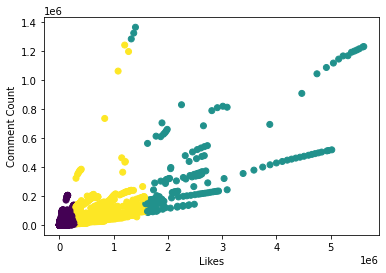

In [192]:
plt.xlabel('Likes')
plt.ylabel('Comment Count')
scatter = plt.scatter(df_us['likes'], df_us['comment_count'], c = model.labels_)

# Canada

In [194]:
df2 = df_ca._get_numeric_data()
df2 = df2.drop(columns='views')

In [195]:
model = kmeans(n_clusters = 3).fit(df2)

In [196]:
cross = pd.crosstab(df_ca['category_id'], model.labels_)
print(cross)

col_0            0   1    2
category_id                
1             1958   0  102
2              353   0    0
10            2983  74  674
15             368   0    1
17            2707   0   80
19             392   0    0
20            1304   0   40
22            4029   5   71
23            3524   0  249
24           13055  25  371
25            4153   0    6
26            1985   0   22
27             982   0    9
28            1129   0   26
29              63   5    6
30               6   0    0
43             124   0    0


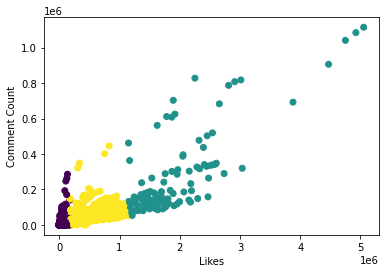

In [198]:
plt.xlabel('Likes')
plt.ylabel('Comment Count')
scatter = plt.scatter(df_ca['likes'], df_ca['comment_count'], c = model.labels_)

# Great Britain

In [199]:
df2 = df_uk._get_numeric_data()
df2 = df2.drop(columns='views')

In [200]:
model = kmeans(n_clusters = 3).fit(df2)

In [202]:
cross = pd.crosstab(df_uk['category_id'], model.labels_)
print(cross)

col_0            0    1     2
category_id                  
1             2577    0     0
2              144    0     0
10           11887  251  1616
15             534    0     0
17            1871    0    36
19              96    0     0
20            1758    0    30
22            2910    0    16
23            1787    0    41
24            8925   31   168
25            1205    0    20
26            1928    0     0
27             457    0     0
28             518    0     0
29              78    8     4
43              20    0     0


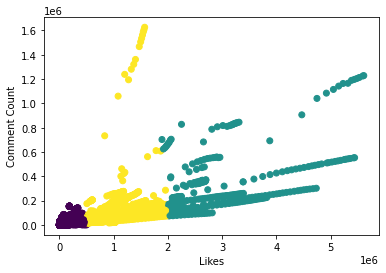

In [204]:
plt.xlabel('Likes')
plt.ylabel('Comment Count')
scatter = plt.scatter(df_uk['likes'], df_uk['comment_count'], c = model.labels_)